# Are the Swedish party leaders becoming more pessimistic?

This is an analysis and re-interpretation of an article in Dagens Nyheter (DN 21/6-2018), where they claim that the leaders of the parties in the Swedish parliment has become more pessimistic in their speeches since 2014. The article is based on a textual analysis of the party leaders speeches and identifies/count words that are associated with a pessimistic world view.

We start to import some Python modules that we need. The first one is part of the standard library, whereas the other four a open source projects, commonly used in data analysis. 

In [138]:
from collections import OrderedDict

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as smf

I have manually entered the values of the relative pessimism from the online version of the DN article. Instead of the date for the speeches at Almedalen (which occurs on different days for the different parties), I have simply put 1:st of July. I have also added an index colum, which runs from 1 to 19 (the number of sample points). I can then import the data into this notebook.

In [139]:
df=pd.read_csv('pessimism.dat', parse_dates=True, index_col="Datum")
df

,Idx,S,MP,V,SD,M,KD,L,C
Datum,,,,,,,,,
2014-01-15,1,0.140,0.110,0.087,0.095,0.126,0.116,0.127,0.098
2014-06-18,2,0.144,0.095,0.147,0.166,0.136,0.074,0.138,0.055
2014-07-01,3,0.107,0.179,0.159,0.122,0.095,0.130,0.139,0.123
2014-10-18,4,0.121,0.087,0.135,0.186,0.064,0.084,0.118,0.112
2015-01-14,5,0.107,0.128,0.113,0.151,0.148,0.148,0.103,0.110
2015-06-10,6,0.165,0.118,0.137,0.148,0.146,0.167,0.147,0.108
2015-07-01,7,0.121,0.120,0.105,0.176,0.105,0.125,0.168,0.139
2015-10-14,8,0.156,0.116,0.111,0.129,0.157,0.137,0.177,0.133
2016-01-13,9,0.149,0.089,0.146,0.138,0.103,0.072,0.144,0.096


I will now create a linear regression model to identify any trends in the relative pessimism. As my independent variable I will choose the index column, i.e. I will replace the dates with an ordinal number. There are of course many ways to do this, but I think this is the closest to what they have done in the DN article. 

From the regression models I will specifially save the slope, the p-value of the slope, the correlation coefficient and the p-value of the regression model.

In [140]:
models = {}
results = {}
saved_results = OrderedDict()
saved_results["Rows"] = ["Slope", "p-val (slope)", "R2", "p-value (model)"] 
for party in "S MP V SD M KD L C".split():
    models[party] = smf.ols("{} ~ Idx".format(party), data=df)
    results[party] = models[party].fit()
    saved_results[party] = [results[party].params[1], results[party].pvalues[1],
                           results[party].rsquared, results[party].f_pvalue]
pd.DataFrame.from_dict(saved_results)

,Rows,S,MP,V,SD,M,KD,L,C
0,Slope,0.000454,0.002232,0.0,0.001609,0.003732,0.000675,0.000944,0.003093
1,p-val (slope),0.646239,0.063884,1.0,0.231819,0.004587,0.569974,0.400382,0.005338
2,R2,0.012681,0.187705,0.0,0.082945,0.385025,0.019359,0.041931,0.374753
3,p-value (model),0.646239,0.063884,1.0,0.231819,0.004587,0.569974,0.400382,0.005338


We can see that the slope is small for all parties. And only for M, the slope is significant at the 95% confidence interval, although it is a matter of judgement. The correlation coefficients are also weak, indicating that there is no strong correlation between time and pessimism. 

To obtain a feeling for the magnitude of the slope, we can do some simple calculations for the most extreme party (M) and for the average party (SD).

In [141]:
m_trend=results['M'].params[0] + results['M'].params[1]*df['Idx']
m_trend_2022=results['M'].params[0] + results['M'].params[1]*(19*2)
sd_trend=results['SD'].params[0] + results['SD'].params[1]*df['Idx']
sd_trend_2022=results['SD'].params[0] + results['SD'].params[1]*(19*2)
print("\tIncrease from 2014\tPessimism in 2022")
print("M\t{0:18.2f}\t{1:17.4f}".format(m_trend[-1] / m_trend[0], m_trend_2022))
print("SD\t{0:18.2f}\t{1:17.4f}".format(sd_trend[-1] / sd_trend[0], sd_trend_2022))

	Increase from 2014	Pessimism in 2022
M	              1.63	           0.2449
SD	              1.21	           0.1989


# Visualization

The code below closley reproduces the plot for Socialdemokraterna (S) as presented in the DN article. It shows the scatter of the pessimism and the trend line of the regression model. From a layman's view it appears that the black trendline indicates that the pessimism has increased between 2014 and 2018

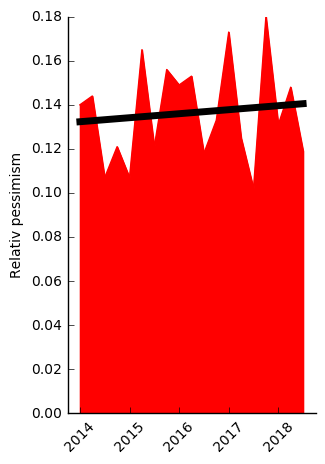

In [142]:
width, height = plt.figaspect(1.6)
f = plt.figure(figsize=(width*0.8,height*0.8), dpi=400)
f.gca().plot(df['Idx'], df['S'], color='r')
f.gca().plot(df['Idx'], results['S'].params[0] + results['S'].params[1]*df['Idx'], color='k', linewidth=5)
f.gca().fill_between(df['Idx'], 0, df['S'], color='r')
f.gca().spines['top'].set_visible(False)
f.gca().spines['right'].set_visible(False)
f.gca().tick_params(top='off', right='off')
f.gca().set_xticks(df['Idx'][::4])
f.gca().set_xticklabels(df.index.year[::4], rotation=45)
f.gca().set_ylabel("Relativ pessimism")
plt.show()

This is the same plot, but the aspect ratio is different. The slope of the trend line seems to be smaller.

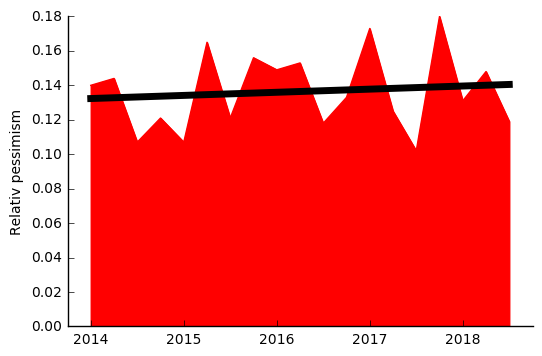

In [143]:
width, height = plt.figaspect(0.4)
f = plt.figure(dpi=400)
f.gca().plot(df['Idx'], df['S'], color='r')
f.gca().plot(df['Idx'], results['S'].params[0] + results['S'].params[1]*df['Idx'], color='k', linewidth=5)
f.gca().fill_between(df['Idx'], 0, df['S'], color='r')
f.gca().spines['top'].set_visible(False)
f.gca().spines['right'].set_visible(False)
f.gca().tick_params(top='off', right='off')
f.gca().set_xticks(df['Idx'][::4])
f.gca().set_xticklabels(df.index.year[::4])
f.gca().set_ylabel("Relativ pessimism")
plt.show()

And this finally shows the plot as a simple scatter plot, similarly to how it was presented in the online version of the DN article. It is hard to judge by eye if there has been an increase in the pessimism. 

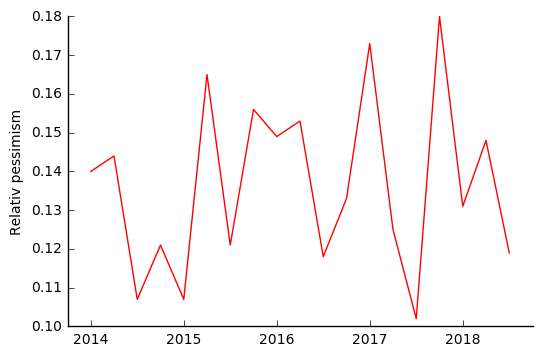

In [144]:
f = plt.figure(dpi=400)
f.gca().plot(df['Idx'], df['S'], color='r')
f.gca().spines['top'].set_visible(False)
f.gca().spines['right'].set_visible(False)
f.gca().tick_params(top='off', right='off')
f.gca().set_xticks(df['Idx'][::4])
f.gca().set_xticklabels(df.index.year[::4])
f.gca().set_ylabel("Relativ pessimism")
plt.show()

# Moderaterna

Below I have plotted the relative pessimism for M and I have marked to date when they elected a new chair (or rather the first date after his inauguration). 

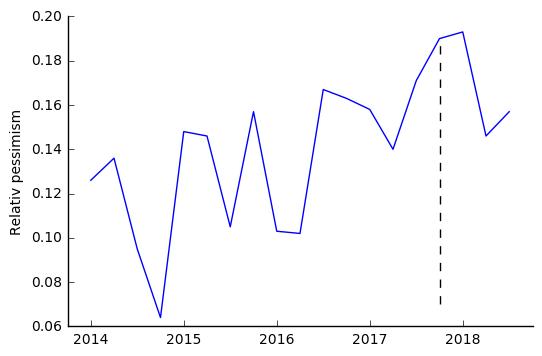

In [145]:
f = plt.figure(dpi=400)
f.gca().plot(df['Idx'], df['M'], color='b')
f.gca().plot((df['Idx'][-4], df['Idx'][-4]), (0.07,0.19), '--k')
f.gca().spines['top'].set_visible(False)
f.gca().spines['right'].set_visible(False)
f.gca().tick_params(top='off', right='off')
f.gca().set_xticks(df['Idx'][::4])
f.gca().set_xticklabels(df.index.year[::4])
f.gca().set_ylabel("Relativ pessimism")
plt.show()

I will create a new regression model for M using only the samples with their old chair. This is to illustrate that the baseline for the two party chairs might be different and hence it is not correct to use a single regression model for the two of them. Then I will also exclude the last point from that data as well, just to prove a point about sample size. 

In [146]:
model_akb0 = smf.ols("M ~ Idx", data=df[:-4])
results_akb0 = model_akb0.fit()
model_akb1 = smf.ols("M ~ Idx", data=df[:-5])
results_akb1 = model_akb1.fit()
print("{0:>18}\t{1:>17}".format("slope","p-value of slope"))
print("{0:18.5f}\t{1:17.5f}".format(results_akb0.params[1], results_akb0.pvalues[1]))
print("{0:18.5f}\t{1:17.5f}".format(results_akb1.params[1], results_akb1.pvalues[1]))

             slope	 p-value of slope
           0.00363	          0.05054
           0.00319	          0.12352
